In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from sklearn.metrics import r2_score
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from scipy import stats

## Error Visible Calculation

In [2]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

## Input Data

In [3]:
train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('new_cases')
test_labels = test_features.pop('new_cases')
X = train_features.to_numpy()
Y = train_labels.to_numpy()
test_X = test_features.to_numpy()
test_Y = test_labels.to_numpy()
input_shape = (3,)

In [4]:
train_features

,date,popluation,AgeGroup
0,265,245353,1
1,370,1677000,1
2,251,1677000,3
3,285,1677000,2
4,389,7544000,2
...,...,...,...
70639,55,1677000,5
70640,237,245353,4
70641,245,7544000,2
70642,68,5071000,3


# MLP

In [38]:
model = Sequential()
model.add(BatchNormalization(input_dim=X.shape[1]))
model.add(Dense(6,activation="tanh"))
model.add(BatchNormalization())
model.add(Dense(18,activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(6,activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(3,activation="relu"))
model.add(Dense(1,activation="linear"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_10 (Batc (None, 3)                 12        
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 24        
_________________________________________________________________
batch_normalization_11 (Batc (None, 6)                 24        
_________________________________________________________________
dense_26 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_27 (Dense)             (None, 6)                 114       
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                

In [39]:
opt = keras.optimizers.Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.compile(loss='MSE', optimizer=opt, metrics=['mean_squared_error'])
model.fit(X, Y, epochs=2000, batch_size=10000, verbose=1, validation_split=0.1,callbacks=[early_stopping])
model.summary()

Epoch 1/2000
7/7 [==============================] - 0s 22ms/step - loss: 26116.8848 - mean_squared_error: 26116.8848 - val_loss: 24799.0156 - val_mean_squared_error: 24799.0156
Epoch 2/2000
7/7 [==============================] - 0s 5ms/step - loss: 26112.6777 - mean_squared_error: 26112.6777 - val_loss: 24791.8320 - val_mean_squared_error: 24791.8320
Epoch 3/2000
7/7 [==============================] - 0s 5ms/step - loss: 26107.7246 - mean_squared_error: 26107.7246 - val_loss: 24783.7559 - val_mean_squared_error: 24783.7559
Epoch 4/2000
7/7 [==============================] - 0s 5ms/step - loss: 26102.0410 - mean_squared_error: 26102.0410 - val_loss: 24774.6680 - val_mean_squared_error: 24774.6680
Epoch 5/2000
7/7 [==============================] - 0s 6ms/step - loss: 26095.3750 - mean_squared_error: 26095.3750 - val_loss: 24764.1055 - val_mean_squared_error: 24764.1055
Epoch 6/2000
7/7 [==============================] - 0s 5ms/step - loss: 26087.6523 - mean_squared_error: 26087.6523 - v

7/7 [==============================] - 0s 5ms/step - loss: 22124.4785 - mean_squared_error: 22124.4785 - val_loss: 20520.7051 - val_mean_squared_error: 20520.7051
Epoch 48/2000
7/7 [==============================] - 0s 5ms/step - loss: 22072.6055 - mean_squared_error: 22072.6055 - val_loss: 20462.1035 - val_mean_squared_error: 20462.1035
Epoch 49/2000
7/7 [==============================] - 0s 5ms/step - loss: 22015.4844 - mean_squared_error: 22015.4844 - val_loss: 20399.1777 - val_mean_squared_error: 20399.1777
Epoch 50/2000
7/7 [==============================] - 0s 5ms/step - loss: 21953.7402 - mean_squared_error: 21953.7402 - val_loss: 20326.5156 - val_mean_squared_error: 20326.5156
Epoch 51/2000
7/7 [==============================] - 0s 5ms/step - loss: 21886.0996 - mean_squared_error: 21886.1035 - val_loss: 20250.9180 - val_mean_squared_error: 20250.9180
Epoch 52/2000
7/7 [==============================] - 0s 5ms/step - loss: 21812.6172 - mean_squared_error: 21812.6172 - val_loss: 

7/7 [==============================] - 0s 5ms/step - loss: 18525.5312 - mean_squared_error: 18525.5312 - val_loss: 16506.1309 - val_mean_squared_error: 16506.1309
Epoch 94/2000
7/7 [==============================] - 0s 5ms/step - loss: 18509.1953 - mean_squared_error: 18509.1953 - val_loss: 16489.1406 - val_mean_squared_error: 16489.1406
Epoch 95/2000
7/7 [==============================] - 0s 5ms/step - loss: 18489.7129 - mean_squared_error: 18489.7129 - val_loss: 16484.3066 - val_mean_squared_error: 16484.3066
Epoch 96/2000
7/7 [==============================] - 0s 5ms/step - loss: 18474.6992 - mean_squared_error: 18474.6992 - val_loss: 16459.8730 - val_mean_squared_error: 16459.8730
Epoch 97/2000
7/7 [==============================] - 0s 5ms/step - loss: 18464.8867 - mean_squared_error: 18464.8867 - val_loss: 16431.6152 - val_mean_squared_error: 16431.6152
Epoch 98/2000
7/7 [==============================] - 0s 5ms/step - loss: 18450.1270 - mean_squared_error: 18450.1270 - val_loss: 

7/7 [==============================] - 0s 5ms/step - loss: 18215.5332 - mean_squared_error: 18215.5312 - val_loss: 16282.5137 - val_mean_squared_error: 16282.5137
Epoch 140/2000
7/7 [==============================] - 0s 5ms/step - loss: 18221.1504 - mean_squared_error: 18221.1504 - val_loss: 16286.7529 - val_mean_squared_error: 16286.7529
Epoch 141/2000
7/7 [==============================] - 0s 5ms/step - loss: 18207.2852 - mean_squared_error: 18207.2852 - val_loss: 16279.6289 - val_mean_squared_error: 16279.6289
Epoch 142/2000
7/7 [==============================] - 0s 5ms/step - loss: 18210.6426 - mean_squared_error: 18210.6445 - val_loss: 16288.5488 - val_mean_squared_error: 16288.5488
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_10 (Batc (None, 3)                 12        
_________________________________________________________________
dense_25 (Dense) 

In [40]:
predict = model.predict(X)
r2_score(Y,predict)

0.24146705501037868

In [41]:
r2_score(test_Y,model.predict(test_X))

0.24754139967406685

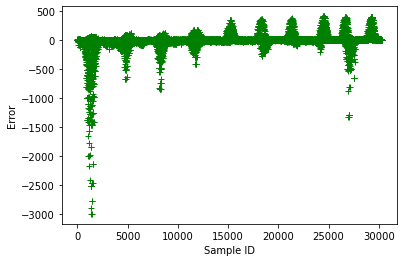

DescribeResult(nobs=30276, minmax=(array([0.00065136], dtype=float32), array([2997.6035], dtype=float32)), mean=array([43.201027], dtype=float32), variance=array([15042.303], dtype=float32), skewness=array([9.889432], dtype=float32), kurtosis=array([150.09741], dtype=float32))

In [42]:
test_predict = model.predict(test_features)

error,abserror = errorCalculate(test_Y,test_predict)
plt.plot(error,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(abserror)

In [43]:
model.save('mlp')

INFO:tensorflow:Assets written to: mlp\assets


In [44]:
model_upload = load_model("mlp")

In [45]:
model_upload.predict(test_X)

array([[22.682428 ],
       [ 7.9997387],
       [ 8.208836 ],
       ...,
       [ 8.903623 ],
       [ 9.094419 ],
       [ 8.699245 ]], dtype=float32)

In [46]:
test_Y

array([7, 0, 0, ..., 0, 0, 1], dtype=int64)